In [2]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [7]:
x.requires_grad_(True)
x.grad

In [8]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [10]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [11]:
x.grad == 4 * x

tensor([True, True, True, True])

In [12]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [14]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [15]:
# 这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [16]:
# 由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x*x关于的x的导数，即2*x。
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [17]:
# Python控制流的梯度计算
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [21]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [19]:
a.grad == d / a

tensor(True)

# 练习

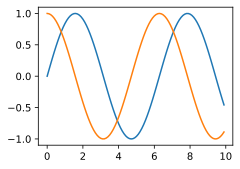

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

x = torch.arange(0.0,10.0,0.1)
x.requires_grad_(True)
x1 = x.detach()
y1 = torch.sin(x1)
y2 = torch.sin(x)
y2.sum().backward()
plt.plot(x1,y1)
plt.plot(x1,x.grad)
